<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task-description:" data-toc-modified-id="Task-description:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task description:</a></span></li><li><span><a href="#Feature-selection-&amp;-visualization" data-toc-modified-id="Feature-selection-&amp;-visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature selection &amp; visualization</a></span><ul class="toc-item"><li><span><a href="#Sample-distribution-over-one-feature" data-toc-modified-id="Sample-distribution-over-one-feature-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sample distribution over one feature</a></span></li><li><span><a href="#Feature-correlation-heatmap" data-toc-modified-id="Feature-correlation-heatmap-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Feature correlation heatmap</a></span></li><li><span><a href="#Feature-extraction-algorithm" data-toc-modified-id="Feature-extraction-algorithm-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Feature extraction algorithm</a></span></li></ul></li><li><span><a href="#Bulid-decision-tree-model" data-toc-modified-id="Bulid-decision-tree-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bulid decision-tree model</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Task description:
Use the decision tree for classification based on Breast cancer dataset available at https://www.kaggle.com/uciml/breast-cancer-wisconsin-data. 
利用可视化工具（graphviz、matplotlib等）来可视化相关的实验结果。

# Feature selection & visualization
一般，我们通过对数据集上的特征进行 __可视化__、__统计量分析__ 等来分析与分类/回归相关的“重要”特征，不重要的特征我们一般会丢弃。

我们有以下方法：
+ __正负样本分布分析__
+ __特征联合分布分析（joint distribution）__
+ __特征相关性分析 （Feature correlation heatmap）__
+ __特征提取/转化算法 RFECV、PCA等（按照一定的指标对特征进行排序或者transform）__

和以下经验：

+ __正负样本分布重合区域较小的特征（更易于样本分类），一般是重要特征__
+ __相关性高的特征中，保留一个即可（几个中选一个“代表”特征）__

下面我将基于kaggle上的 Breast cancer dataset, 使用了来自[Paul Mooney](https://www.kaggle.com/paultimothymooney/decision-trees-for-binary-classification-0-99) 的代码来演示数据集上特征的提取和可视化

Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
import graphviz
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
sizeMeasurements = pd.DataFrame(data, columns=columns)
X = sizeMeasurements[sizeMeasurements.columns[:-1]]
y = sizeMeasurements.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
print('\n Feature Names: \n\n', X.columns.values, "\n")


 Feature Names: 

 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 



## Sample distribution over one feature

从下图中可以看出正/负样本在`mean area`、`mean concave points`两个特征上的分布差异较大，我们可以认为它们属于“关键特征”。

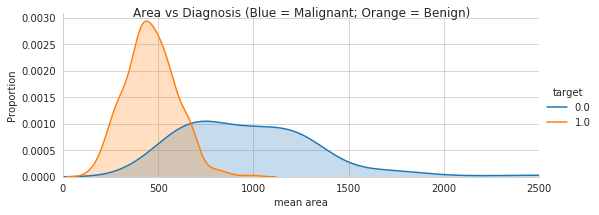

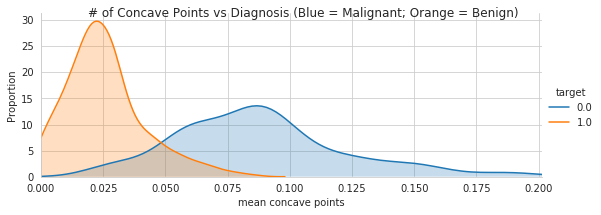

In [3]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(sizeMeasurements, hue="target", aspect=2.5)
plotOne.map(sns.kdeplot, 'mean area', shade=True)
plotOne.set(xlim=(0, sizeMeasurements['mean area'].max()))
plotOne.add_legend()
plotOne.set_axis_labels('mean area', 'Proportion')
plotOne.fig.suptitle('Area vs Diagnosis (Blue = Malignant; Orange = Benign)')
plt.show()

sns.set_style("whitegrid")
plotTwo = sns.FacetGrid(sizeMeasurements, hue="target", aspect=2.5)
plotTwo.map(sns.kdeplot, 'mean concave points', shade=True)
plotTwo.set(xlim=(0, sizeMeasurements['mean concave points'].max()))
plotTwo.add_legend()
plotTwo.set_axis_labels('mean concave points', 'Proportion')
plotTwo.fig.suptitle(
    '# of Concave Points vs Diagnosis (Blue = Malignant; Orange = Benign)')
plt.show()

## Feature correlation heatmap

从下图的“特征相关性”可以看出，例如`mean area`、`mean perimeter`、`mean smoothness`几个特征之间的相关性较高，所以几个之间保留一个即可。


Feature Correlation:



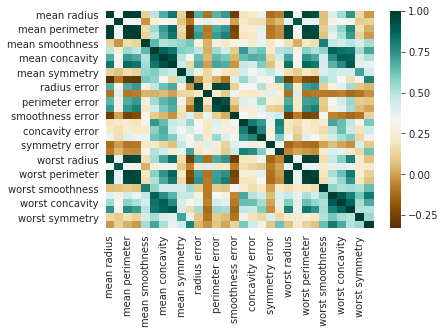

In [4]:
print("\nFeature Correlation:\n")
g = sns.heatmap(X_train.corr(),cmap="BrBG",annot=False)

## Feature extraction algorithm

使用PCA算法从多个特征中提取主要的 K 个特征（feature transformation & extraction），从下图可以看出使用PCA算法对原始特征进行降维（transform）所得到的 K 个特征中，特征之间的相关性很低。


Feature Correlation:



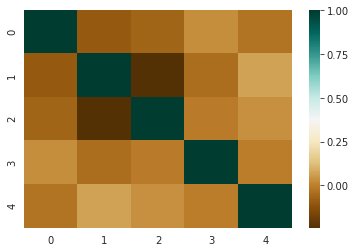

In [5]:
from sklearn.decomposition import PCA
X3=X
y3=y
# Minimum percentage of variance we want to be described by the resulting transformed components
variance_pct = 5 
pca = PCA(n_components=variance_pct) # Create PCA object
X_transformed = pca.fit_transform(X3,y3) # Transform the initial features
X3pca = pd.DataFrame(X_transformed) # Create a data frame from the PCA'd data
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3pca, y3, test_size=0.2)

print("\nFeature Correlation:\n")
g = sns.heatmap(X_train3.corr(),cmap="BrBG",annot=False)

# Bulid decision-tree model

调用了 sklearn 中的 `DecisionTreeClassifier`，其中 正例 = benign（良性）负例 = malignant（恶性）。

(1) 使用所有的特征（30个特征）来建立决策树

In [6]:
print("训练集: X", X_train.shape, " Y", Y_train.shape,"  测试集: X", X_test.shape, " Y",Y_test.shape)

训练集: X (455, 30)  Y (455,)   测试集: X (114, 30)  Y (114,)


In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
y_hat = clf.predict(X_test)

(2) 使用 2.3 中 PCA 处理过的特征（5个）来建立决策树

In [8]:
print("训练集: X", X_train3.shape, " Y", Y_train3.shape,"  测试集: X", X_test3.shape, " Y",Y_test3.shape)

训练集: X (455, 5)  Y (455,)   测试集: X (114, 5)  Y (114,)


In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train3, Y_train3)
y3_hat = clf.predict(X_test3)

# Test
所建立的决策树模型在测试集上的表现

In [10]:
def evaluation(y, y_hat):
    '''
    Binary classification problem
    y: real label, numpy.ndarray, shape (N, ) 
    y_hat: predict label, numpy.ndarray, shape (N, )
    
    return: recall, precision
    '''
    temp = y + y_hat

    P = len(y_hat[y_hat == 1])
    N = len(y_hat[y_hat == 0])
    
    TP = len(temp[temp == 2])
    TN = len(temp[temp == 0])
    FP = P - TP 
    FN = N - TN
    
    recall = TP/(TP+FN)
    precision = TP/(TP+TN)
    
    return recall, precision

(1) 特征未作处理所建立的模型：

In [11]:
print("recall: %.2f \nprecision: %.2f"%(evaluation(Y_test, y_hat)))

recall: 0.91 
precision: 0.67


(2) 使用PCA进行特征transform后所建立的模型：

In [12]:
print("recall: %.2f \nprecision: %.2f"%(evaluation(Y_test3, y3_hat)))

recall: 0.97 
precision: 0.68


可以看出特征预处理后建立的模型的表现更优！

# Summary

本次作业侧重了特征的可视化和分析部分！

Part 2 部分的可视化代码来自：
- https://www.kaggle.com/paultimothymooney/decision-trees-for-binary-classification-0-99

Part 2 部分总结的想法主要参考了：
- https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

学习了其中的特征可视化、分析和提取的方法和思想。